In [1]:
import os
import csv
import pandas as pd

# Set the path to your folder
folder_path = 'C:/Users/luckseegan/Desktop/Datadisca/Clustering/dataset'

# Initialize an empty list to store the DataFrames
dfs = []

# Loop through all files in the folder
for filename in os.listdir(folder_path):
    # Check if the file is a CSV file
    if filename.endswith('.csv'):
        # Print the file name
        print('File name:', filename)
        
        # Get the dataset name from the file name
        dataset_name = filename.split('_')[2].split('.')[0]
        
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(os.path.join(folder_path, filename))
        
        # Add the dataset name as a new column
        df['dataset'] = dataset_name
        
        # Append the DataFrame to the list
        dfs.append(df)

# Concatenate all the DataFrames into a single DataFrame
merged_df = pd.concat(dfs)

# Write the merged DataFrame to a new CSV file
merged_df.to_csv(os.path.join(folder_path, 'merged_datasets.csv'), index=False)

File name: clustering_results_gas-drift-different-concentrations.csv
File name: clustering_results_glass.csv
File name: clustering_results_haberman.csv
File name: clustering_results_iris.csv
File name: clustering_results_isolet.csv
File name: clustering_results_letter.csv
File name: clustering_results_libras.csv
File name: clustering_results_MagicTelescope.csv
File name: clustering_results_nursery.csv
File name: clustering_results_satelite.csv
File name: clustering_results_wine.csv


In [62]:
import plotly.express as px
import pandas as pd
import ast
from plotly.subplots import make_subplots


def plot_clusters(df, row_nums):
    # Get the data for the best parameter combinations
    best_params = df.iloc[row_nums]
    algos = best_params['Algorithm'].unique()

    # Create a figure with subplots for each algorithm
    fig = make_subplots(
        nrows=len(algos), ncols=1, shared_xaxes=True, shared_yaxes=True,
        subplot_titles=[f"{a} with F1 Score={best_params[best_params['Algorithm']==a]['F1 Score'].iloc[0]:.2f}" for a in algos]
    )
    
    # Iterate over each algorithm and plot the clusters
    for i, algo in enumerate(algos):
        # Get the best parameter combination for the algorithm
        best_params_algo = best_params[best_params['Algorithm']==algo]
        params = ast.literal_eval(best_params_algo['Parameters'].iloc[0])

        # Create the clustering model with the best parameters
        if algo == 'KMeans':
            model = KMeans(n_clusters=params['n_clusters'], init=params['init'], max_iter=params['max_iter'], random_state=42)
        elif algo == 'Agglomerative':
            model = AgglomerativeClustering(n_clusters=params['n_clusters'], linkage=params['linkage'])
        elif algo == 'DBScan':
            model = DBSCAN(eps=params['eps'], min_samples=params['min_samples'])
        elif algo == 'Optics':
            model = OPTICS(min_samples=params['min_samples'], xi=params['xi'], min_cluster_size=params['min_cluster_size'])
        elif algo == 'GaussianMixture':
            model = GaussianMixture(n_components=params['n_components'], covariance_type=params['covariance_type'], random_state=42)
        elif algo == 'AffinityPropagation':
            model = AffinityPropagation(damping=params['damping'], preference=params['preference'])
        elif algo == 'MeanShift':
            model = MeanShift(bandwidth=params['bandwidth'])
        elif algo == 'Spectral':
            model = SpectralClustering(n_clusters=params['n_clusters'], affinity=params['affinity'], eigen_solver=params['eigen_solver'], assign_labels=params['assign_labels'])
        elif algo == 'Ward':
            model = AgglomerativeClustering(n_clusters=params['n_clusters'], linkage='ward', affinity=params['affinity'])
        elif algo == 'Birch':
            model = Birch(threshold=params['threshold'], branching_factor=params['branching_factor'], n_clusters=params['n_clusters'])

        # Fit the model and get the predicted labels
        X = df[df['Algorithm']==algo].drop(['Algorithm', 'Parameters', 'dataset'], axis=1)
        model.fit(X)
        labels = model.labels_

        # Add the predicted labels to the dataframe
        df.loc[df['Algorithm']==algo, 'Labels'] = labels

        # Plot the clusters using plotly
        fig.add_trace(
            px.scatter(df[df['Algorithm']==algo], x='Feature 1', y='Feature 2', color='Labels', title=algo).data[0],
            row=i+1, col=1
        )

    # Update the figure layout
    fig.update_layout(
        height=800, width=1000,
        showlegend=False,
        title='Clustering Results'
    )

    # Show the
    fig.show

In [63]:
row_numbers = [13, 23, 50, 61, 128, 87, 92, 133, 111]
plot_clusters(results, row_numbers)

TypeError: make_subplots() got unexpected keyword argument(s): ['nrows', 'ncols']

In [270]:
import pandas as pd

# assume your original DataFrame is called df
row_numbers = [17, 23, 29, 48, 86, 158, 98, 109, 150, 145 ]
selected_rows = results.loc[row_numbers]

# print the selected
df=selected_rows[['Algorithm','Parameters']]
df

Algorithm  \
17                    KMeans   
23   AgglomerativeClustering   
29   AgglomerativeClustering   
48                    DBSCAN   
86           GaussianMixture   
158      AffinityPropagation   
98                 MeanShift   
109       SpectralClustering   
150                     Ward   
145                    Birch   

                                            Parameters  
17   {'init': 'random', 'max_iter': 500, 'n_cluster...  
23   {'affinity': 'euclidean', 'linkage': 'average'...  
29   {'affinity': 'manhattan', 'linkage': 'complete...  
48                      {'eps': 1.5, 'min_samples': 3}  
86   {'covariance_type': 'diag', 'max_iter': 500, '...  
158                  {'damping': 0.9, 'max_iter': 200}  
98             {'bandwidth': 1.0, 'cluster_all': True}  
109  {'affinity': 'nearest_neighbors', 'n_clusters'...  
150  {'affinity': 'euclidean', 'linkage': 'ward', '...  
145  {'branching_factor': 100, 'n_clusters': 4, 'th...

In [68]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from sklearn.datasets import load_iris
#from sklearn.cluster import KMeans, AgglomerativeClustering, OPTICS, GaussianMixture, AffinityPropagation, MeanShift, SpectralClustering, Birch, Ward

# Load the iris dataset
iris = load_iris()

# Define the clustering algorithms
algorithms = [
    KMeans(**eval(df['Parameters'].iloc[i])),
    AgglomerativeClustering(**eval(df['Parameters'].iloc[i])),
    OPTICS(**eval(df['Parameters'].iloc[i])),
    GaussianMixture(**eval(df['Parameters'].iloc[i])),
    AffinityPropagation(**eval(df['Parameters'].iloc[i])),
    MeanShift(**eval(df['Parameters'].iloc[i])),
    SpectralClustering(**eval(df['Parameters'].iloc[i])),
    Birch(**eval(df['Parameters'].iloc[i])),
    Ward(**eval(df['Parameters'].iloc[i]))
]

# Define the colors for each cluster
colors = {
    0: 'rgb(31, 119, 180)',
    1: 'rgb(255, 127, 14)',
    2: 'rgb(44, 160, 44)',
    3: 'rgb(214, 39, 40)',
    4: 'rgb(148, 103, 189)',
    5: 'rgb(140, 86, 75)',
    6: 'rgb(227, 119, 194)',
    7: 'rgb(127, 127, 127)',
    8: 'rgb(188, 189, 34)',
    9: 'rgb(23, 190, 207)'
}

# Create the subplots
fig = make_subplots(rows=3, cols=3, subplot_titles=df.index)

# Loop over the algorithms and add the clusters to the subplots
for i, algorithm in enumerate(algorithms):
    # Fit the algorithm to the iris dataset
    algorithm.fit(iris.data)
    
    # Get the predicted clusters and add them to the subplots
    clusters = algorithm.labels_
    fig.add_trace(go.Scatter(x=iris.data[:, 0], y=iris.data[:, 1], mode='markers', 
                             marker=dict(color=[colors[c] for c in clusters]), showlegend=False),
                  row=(i // 3) + 1, col=(i % 3) + 1)

# Set the layout of the subplots
fig.update_layout(title='Clustering Results for Iris Dataset',
                  height=800, width=800, hovermode='closest')

# Show the plot
fig.show()


TypeError: AgglomerativeClustering.__init__() got an unexpected keyword argument 'init'

In [189]:
merged_df

Algorithm                                         Parameters  \
0                 KMeans  {'init': 'k-means++', 'max_iter': 100, 'n_clus...   
1                 KMeans  {'init': 'k-means++', 'max_iter': 100, 'n_clus...   
2                 KMeans  {'init': 'k-means++', 'max_iter': 100, 'n_clus...   
3                 KMeans  {'init': 'k-means++', 'max_iter': 100, 'n_clus...   
4                 KMeans  {'init': 'k-means++', 'max_iter': 100, 'n_clus...   
..                   ...                                                ...   
134  AffinityPropagation                 {'damping': 0.9, 'preference': -1}   
135                 Ward  {'affinity': 'euclidean', 'linkage': 'ward', '...   
136                 Ward  {'affinity': 'euclidean', 'linkage': 'ward', '...   
137                 Ward  {'affinity': 'euclidean', 'linkage': 'ward', '...   
138                 Ward  {'affinity': 'euclidean', 'linkage': 'ward', '...   

     F1 Score  Adjusted Rand Score  Silhouette Score  Execution Time  \
0    0.054097             0.033598          0.425760        2.826405   
1    0.122173             0.060306          0.313437        2.311292   
2    0.213043             0.080008          0.338998        3.462056   
3    0.099140             0.060097          0.280078        5.479806   
4    0.064159             0.067602          0.289693        3.792276   
..        ...                  ...               ...             ...   
134  0.119694             0.323418          0.112200        0.103678   
135  0.222343             0.484739          0.296668        0.015625   
136  0.023385             0.931000          0.294829        0.015626   
137  0.300010             0.769743          0.248703        0.015627   
138  0.220375             0.683793          0.204154        0.015627   

                                dataset  
0    gas-drift-different-concentrations  
1    gas-drift-different-concentrations  
2    gas-drift-different-concentrations  
3    gas-drift-different-concentrations  
4    gas-drift-different-concentrations  
..                                  ...  
134                                wine  
135                                wine  
136                                wine  
137                                wine  
138                                wine  

[1433 rows x 7 columns]

In [276]:
df=merged_df
results = df.loc[df['dataset'] == 'libras']
results['Algorithm'].unique()

array(['KMeans', 'AgglomerativeClustering', 'DBSCAN', 'OPTICS',
       'GaussianMixture', 'MeanShift', 'SpectralClustering', 'Birch',
       'Ward', 'AffinityPropagation'], dtype=object)

In [280]:
# assume your original DataFrame is called df
row_numbers = [17, 23, 51, 48, 86, 158, 98, 109, 150, 145]
selected_rows = results.loc[row_numbers]

# print the selected
df=selected_rows[['Algorithm','Parameters']]
#selected_rows

In [257]:
df=merged_df
df_filtered = df[(df['Algorithm'] == 'KMeans') & (df['dataset'] == 'libras')]
df_filtered

Algorithm                                         Parameters  F1 Score  \
0     KMeans  {'init': 'k-means++', 'max_iter': 100, 'n_clus...  0.016749   
1     KMeans  {'init': 'k-means++', 'max_iter': 100, 'n_clus...  0.018033   
2     KMeans  {'init': 'k-means++', 'max_iter': 100, 'n_clus...  0.022245   
3     KMeans  {'init': 'k-means++', 'max_iter': 300, 'n_clus...  0.017034   
4     KMeans  {'init': 'k-means++', 'max_iter': 300, 'n_clus...  0.025053   
5     KMeans  {'init': 'k-means++', 'max_iter': 300, 'n_clus...  0.021165   
6     KMeans  {'init': 'k-means++', 'max_iter': 500, 'n_clus...  0.017034   
7     KMeans  {'init': 'k-means++', 'max_iter': 500, 'n_clus...  0.017203   
8     KMeans  {'init': 'k-means++', 'max_iter': 500, 'n_clus...  0.021415   
9     KMeans  {'init': 'random', 'max_iter': 100, 'n_cluster...  0.016749   
10    KMeans  {'init': 'random', 'max_iter': 100, 'n_cluster...  0.024027   
11    KMeans  {'init': 'random', 'max_iter': 100, 'n_cluster...  0.016934   
12    KMeans  {'init': 'random', 'max_iter': 300, 'n_cluster...  0.016716   
13    KMeans  {'init': 'random', 'max_iter': 300, 'n_cluster...  0.025104   
14    KMeans  {'init': 'random', 'max_iter': 300, 'n_cluster...  0.024672   
15    KMeans  {'init': 'random', 'max_iter': 500, 'n_cluster...  0.013953   
16    KMeans  {'init': 'random', 'max_iter': 500, 'n_cluster...  0.018033   
17    KMeans  {'init': 'random', 'max_iter': 500, 'n_cluster...  0.027416   

    Adjusted Rand Score  Silhouette Score  Execution Time dataset  
0              0.066410          0.215113        0.390684  libras  
1              0.059373          0.173988        0.389390  libras  
2              0.123315          0.184316        0.343802  libras  
3              0.066362          0.212546        0.328545  libras  
4              0.054719          0.173943        0.312544  libras  
5              0.123315          0.184316        0.265664  libras  
6              0.066362          0.212546        0.218781  libras  
7              0.059704          0.172984        0.249052  libras  
8              0.121481          0.183217        0.234410  libras  
9              0.066410          0.215113        0.218778  libras  
10             0.055746          0.173501        0.203154  libras  
11             0.123315          0.184316        0.248703  libras  
12             0.067048          0.212658        0.218783  libras  
13             0.054719          0.173943        0.218782  libras  
14             0.115431          0.181832        0.218782  libras  
15             0.066410          0.215113        0.215161  libras  
16             0.059373          0.173988        0.218780  libras  
17             0.123315          0.184316        0.234409  libras

17 row

In [258]:
df_filtered = df[(df['Algorithm'] == 'AgglomerativeClustering') & (df['dataset'] == 'libras')]
df_filtered

Algorithm  \
18  AgglomerativeClustering   
19  AgglomerativeClustering   
20  AgglomerativeClustering   
21  AgglomerativeClustering   
22  AgglomerativeClustering   
23  AgglomerativeClustering   
24  AgglomerativeClustering   
25  AgglomerativeClustering   
26  AgglomerativeClustering   
27  AgglomerativeClustering   
28  AgglomerativeClustering   
29  AgglomerativeClustering   
30  AgglomerativeClustering   
31  AgglomerativeClustering   
32  AgglomerativeClustering   
33  AgglomerativeClustering   
34  AgglomerativeClustering   
35  AgglomerativeClustering   
36  AgglomerativeClustering   
37  AgglomerativeClustering   
38  AgglomerativeClustering   
39  AgglomerativeClustering   
40  AgglomerativeClustering   
41  AgglomerativeClustering   

                                           Parameters  F1 Score  \
18  {'affinity': 'euclidean', 'linkage': 'complete...  0.020641   
19  {'affinity': 'euclidean', 'linkage': 'complete...  0.015556   
20  {'affinity': 'euclidean', 'linkage': 'complete...  0.019488   
21  {'affinity': 'euclidean', 'linkage': 'complete...  0.001223   
22  {'affinity': 'euclidean', 'linkage': 'average'...  0.009357   
23  {'affinity': 'euclidean', 'linkage': 'average'...  0.007973   
24  {'affinity': 'euclidean', 'linkage': 'average'...  0.023119   
25  {'affinity': 'euclidean', 'linkage': 'average'...  0.011189   
26  {'affinity': 'manhattan', 'linkage': 'complete...  0.018084   
27  {'affinity': 'manhattan', 'linkage': 'complete...  0.026068   
28  {'affinity': 'manhattan', 'linkage': 'complete...  0.030408   
29  {'affinity': 'manhattan', 'linkage': 'complete...  0.083827   
30  {'affinity': 'manhattan', 'linkage': 'average'...  0.018974   
31  {'affinity': 'manhattan', 'linkage': 'average'...  0.023118   
32  {'affinity': 'manhattan', 'linkage': 'average'...  0.021523   
33  {'affinity': 'manhattan', 'linkage': 'average'...  0.010997   
34  {'affinity': 'cosine', 'linkage': 'complete', ...  0.007186   
35  {'affinity': 'cosine', 'linkage': 'complete', ...  0.008247   
36  {'affinity': 'cosine', 'linkage': 'complete', ...  0.024026   
37  {'affinity': 'cosine', 'linkage': 'complete', ...  0.042090   
38  {'affinity': 'cosine', 'linkage': 'average', '...  0.008355   
39  {'affinity': 'cosine', 'linkage': 'average', '...  0.008028   
40  {'affinity': 'cosine', 'linkage': 'average', '...  0.014300   
41  {'affinity': 'cosine', 'linkage': 'average', '...  0.021855   

    Adjusted Rand Score  Silhouette Score  Execution Time dataset  
18             0.038309          0.082707        0.031254  libras  
19             0.063428          0.107028        0.031255  libras  
20             0.109357          0.139895        0.046881  libras  
21             0.109467          0.128442        0.046881  libras  
22             0.013502          0.185131        0.031256  libras  
23             0.033919          0.185730        0.031255  libras  
24             0.036157          0.164341        0.015626  libras  
25             0.036326          0.153016        0.031253  libras  
26             0.028088          0.156309        0.025114  libras  
27             0.052586          0.123618        0.031257  libras  
28             0.081679          0.149971        0.015625  libras  
29             0.085379          0.150254        0.031252  libras  
30             0.037282          0.215631        0.031253  libras  
31             0.041191          0.204680        0.031250  libras  
32             0.041097          0.187947        0.031252  libras  
33             0.042330          0.185996        0.031253  libras  
34             0.020910          0.186523        0.031254  libras  
35             0.041973          0.202968        0.031251  libras  
36             0.085341          0.153670        0.031252  libras  
37             0.082688          0.147567        0.031252  libras  
38             0.000000          0.240195        0.031251  libras  
39            -0.000002          0.125056        0.031254  libras  
40

23

In [277]:
df_filtered = df[(df['Algorithm'] == 'OPTICS') & (df['dataset'] == 'libras')]
df_filtered

Algorithm                      Parameters  F1 Score  Adjusted Rand Score  \
51    OPTICS  {'min_samples': 3, 'xi': 0.01}  0.096666             0.053056   
52    OPTICS  {'min_samples': 3, 'xi': 0.05}  0.096666             0.046286   
53    OPTICS   {'min_samples': 3, 'xi': 0.1}  0.059814             0.040357   
54    OPTICS  {'min_samples': 5, 'xi': 0.01}  0.026667             0.083420   
55    OPTICS  {'min_samples': 5, 'xi': 0.05}  0.094967             0.061112   
56    OPTICS   {'min_samples': 5, 'xi': 0.1}  0.018391             0.039467   
57    OPTICS  {'min_samples': 7, 'xi': 0.01}  0.000000             0.055953   
58    OPTICS  {'min_samples': 7, 'xi': 0.05}  0.013333             0.024293   
59    OPTICS   {'min_samples': 7, 'xi': 0.1}  0.000000             0.014319   

    Silhouette Score  Execution Time dataset  
51          0.032374        7.475341  libras  
52          0.003240        6.915824  libras  
53         -0.025552        6.944476  libras  
54         -0.042729        7.316500  libras  
55         -0.086493        7.770084  libras  
56         -0.158084        7.256878  libras  
57         -0.038837        7.211770  libras  
58         -0.153615        7.180532  libras  
59         -0.085481        7.178470  libras

51

In [259]:
df_filtered = df[(df['Algorithm'] == 'DBSCAN') & (df['dataset'] == 'libras')]
df_filtered

Algorithm                      Parameters  F1 Score  Adjusted Rand Score  \
42    DBSCAN  {'eps': 0.5, 'min_samples': 3}  0.085041             0.023263   
43    DBSCAN  {'eps': 0.5, 'min_samples': 5}  0.000000             0.005845   
44    DBSCAN  {'eps': 0.5, 'min_samples': 7}  0.000000             0.001348   
45    DBSCAN  {'eps': 1.0, 'min_samples': 3}  0.019814             0.114894   
46    DBSCAN  {'eps': 1.0, 'min_samples': 5}  0.055211             0.096090   
47    DBSCAN  {'eps': 1.0, 'min_samples': 7}  0.011217             0.062343   
48    DBSCAN  {'eps': 1.5, 'min_samples': 3}  0.027672             0.002545   
49    DBSCAN  {'eps': 1.5, 'min_samples': 5}  0.027322             0.002943   
50    DBSCAN  {'eps': 1.5, 'min_samples': 7}  0.027365             0.002880   

    Silhouette Score  Execution Time dataset  
42         -0.237263        0.031250  libras  
43         -0.285436        0.031254  libras  
44         -0.140371        0.031255  libras  
45         -0.010600        0.048760  libras  
46         -0.049879        0.031257  libras  
47         -0.018397        0.031253  libras  
48          0.084804        0.031255  libras  
49          0.083125        0.031255  libras  
50          0.082605        0.031254  libras

In [260]:
48

48

In [261]:
df_filtered = df[(df['Algorithm'] == 'GaussianMixture') & (df['dataset'] == 'libras')]
df_filtered

Algorithm                                         Parameters  \
60  GaussianMixture  {'covariance_type': 'full', 'max_iter': 100, '...   
61  GaussianMixture  {'covariance_type': 'full', 'max_iter': 100, '...   
62  GaussianMixture  {'covariance_type': 'full', 'max_iter': 100, '...   
63  GaussianMixture  {'covariance_type': 'full', 'max_iter': 300, '...   
64  GaussianMixture  {'covariance_type': 'full', 'max_iter': 300, '...   
65  GaussianMixture  {'covariance_type': 'full', 'max_iter': 300, '...   
66  GaussianMixture  {'covariance_type': 'full', 'max_iter': 500, '...   
67  GaussianMixture  {'covariance_type': 'full', 'max_iter': 500, '...   
68  GaussianMixture  {'covariance_type': 'full', 'max_iter': 500, '...   
69  GaussianMixture  {'covariance_type': 'tied', 'max_iter': 100, '...   
70  GaussianMixture  {'covariance_type': 'tied', 'max_iter': 100, '...   
71  GaussianMixture  {'covariance_type': 'tied', 'max_iter': 100, '...   
72  GaussianMixture  {'covariance_type': 'tied', 'max_iter': 300, '...   
73  GaussianMixture  {'covariance_type': 'tied', 'max_iter': 300, '...   
74  GaussianMixture  {'covariance_type': 'tied', 'max_iter': 300, '...   
75  GaussianMixture  {'covariance_type': 'tied', 'max_iter': 500, '...   
76  GaussianMixture  {'covariance_type': 'tied', 'max_iter': 500, '...   
77  GaussianMixture  {'covariance_type': 'tied', 'max_iter': 500, '...   
78  GaussianMixture  {'covariance_type': 'diag', 'max_iter': 100, '...   
79  GaussianMixture  {'covariance_type': 'diag', 'max_iter': 100, '...   
80  GaussianMixture  {'covariance_type': 'diag', 'max_iter': 100, '...   
81  GaussianMixture  {'covariance_type': 'diag', 'max_iter': 300, '...   
82  GaussianMixture  {'covariance_type': 'diag', 'max_iter': 300, '...   
83  GaussianMixture  {'covariance_type': 'diag', 'max_iter': 300, '...   
84  GaussianMixture  {'covariance_type': 'diag', 'max_iter': 500, '...   
85  GaussianMixture  {'covariance_type': 'diag', 'max_iter': 500, '...   
86  GaussianMixture  {'covariance_type': 'diag', 'max_iter': 500, '...   
87  GaussianMixture  {'covariance_type': 'spherical', 'max_iter': 1...   
88  GaussianMixture  {'covariance_type': 'spherical', 'max_iter': 1...   
89  GaussianMixture  {'covariance_type': 'spherical', 'max_iter': 1...   
90  GaussianMixture  {'covariance_type': 'spherical', 'max_iter': 3...   
91  GaussianMixture  {'covariance_type': 'spherical', 'max_iter': 3...   
92  GaussianMixture  {'covariance_type': 'spherical', 'max_iter': 3...   
93  GaussianMixture  {'covariance_type': 'spherical', 'max_iter': 5...   
94  GaussianMixture  {'covariance_type': 'spherical', 'max_iter': 5...   
95  GaussianMixture  {'covariance_type': 'spherical', 'max_iter': 5...   

    F1 Score  Adjusted Rand Score  Silhouette Score  Execution Time dataset  
60  0.014996             0.089082          0.071295        0.093765  libras  
61  0.024649             0.060065          0.172124        0.062508  libras  
62  0.024021             0.075416          0.188771        0.062511  libras  
63  0.021902             0.049757          0.040342        0.155977  libras  
64  0.017057             0.058753          0.167912        0.078137  libras  
65  0.039477             0.117024          0.180675        0.078138  libras  
66  0.014957             0.090115          0.071196        0.078135  libras  
67  0.031023             0.109445          0.119246        0.203151  libras  
68  0.017792             0.111480          0.172716        0.125021  libras  
69  0.017451             0.040512          0.140071        0.078139  libras  
70  0.010063             0.072225          0.144528        0.125024  libras  
71  0.041694             0.076176          0.168399        0.106253  libras  
72  0.016749             0.067682          0.214483        0.062509  libras  
73  0.015656             0.077047          0.199089        0.062511  libras  
74  0.023978             0.160707          0.168649        0.109392  libras  
75  0.013953           

86

In [262]:
df_filtered = df[(df['Algorithm'] == 'AffinityPropagation') & (df['dataset'] == 'libras')]
df_filtered

Algorithm                         Parameters  F1 Score  \
151  AffinityPropagation  {'damping': 0.5, 'max_iter': 100}  0.022989   
152  AffinityPropagation  {'damping': 0.5, 'max_iter': 200}  0.022989   
153  AffinityPropagation  {'damping': 0.5, 'max_iter': 300}  0.022989   
154  AffinityPropagation  {'damping': 0.7, 'max_iter': 100}  0.025766   
155  AffinityPropagation  {'damping': 0.7, 'max_iter': 200}  0.025766   
156  AffinityPropagation  {'damping': 0.7, 'max_iter': 300}  0.025766   
157  AffinityPropagation  {'damping': 0.9, 'max_iter': 100}  0.027927   
158  AffinityPropagation  {'damping': 0.9, 'max_iter': 200}  0.028117   
159  AffinityPropagation  {'damping': 0.9, 'max_iter': 300}  0.028117   

     Adjusted Rand Score  Silhouette Score  Execution Time dataset  
151             0.288227          0.245326        0.593846  libras  
152             0.288227          0.245326        0.560242  libras  
153             0.288227          0.245326        0.514375  libras  
154             0.285203          0.244562        0.932497  libras  
155             0.285203          0.244562        0.899287  libras  
156             0.286299          0.243310        0.667682  libras  
157             0.252278          0.212953        0.861762  libras  
158             0.291664          0.245192        1.310911  libras  
159             0.291664          0.245192        1.579090  libras

158

In [263]:
df_filtered = df[(df['Algorithm'] == 'MeanShift') & (df['dataset'] == 'libras')]
df_filtered

Algorithm                                Parameters  F1 Score  \
96   MeanShift   {'bandwidth': 0.5, 'cluster_all': True}  0.000000   
97   MeanShift  {'bandwidth': 0.5, 'cluster_all': False}  0.000000   
98   MeanShift   {'bandwidth': 1.0, 'cluster_all': True}  0.021505   
99   MeanShift  {'bandwidth': 1.0, 'cluster_all': False}  0.021505   
100  MeanShift   {'bandwidth': 1.5, 'cluster_all': True}  0.061675   
101  MeanShift  {'bandwidth': 1.5, 'cluster_all': False}  0.053617   

     Adjusted Rand Score  Silhouette Score  Execution Time dataset  
96              0.071076          0.271885       14.514113  libras  
97              0.068539          0.267651       15.660952  libras  
98              0.263733          0.251153       27.365929  libras  
99              0.188532          0.209044       35.897301  libras  
100             0.172920          0.174085       77.649981  libras  
101             0.108256          0.083104       76.308537  libras

98

In [264]:
df_filtered = df[(df['Algorithm'] == 'SpectralClustering') & (df['dataset'] == 'libras')]
df_filtered

Algorithm                                         Parameters  \
102  SpectralClustering  {'affinity': 'nearest_neighbors', 'n_clusters'...   
103  SpectralClustering  {'affinity': 'nearest_neighbors', 'n_clusters'...   
104  SpectralClustering  {'affinity': 'nearest_neighbors', 'n_clusters'...   
105  SpectralClustering  {'affinity': 'nearest_neighbors', 'n_clusters'...   
106  SpectralClustering  {'affinity': 'nearest_neighbors', 'n_clusters'...   
107  SpectralClustering  {'affinity': 'nearest_neighbors', 'n_clusters'...   
108  SpectralClustering  {'affinity': 'nearest_neighbors', 'n_clusters'...   
109  SpectralClustering  {'affinity': 'nearest_neighbors', 'n_clusters'...   
110  SpectralClustering  {'affinity': 'nearest_neighbors', 'n_clusters'...   
111  SpectralClustering  {'affinity': 'rbf', 'n_clusters': 2, 'n_neighb...   
112  SpectralClustering  {'affinity': 'rbf', 'n_clusters': 2, 'n_neighb...   
113  SpectralClustering  {'affinity': 'rbf', 'n_clusters': 2, 'n_neighb...   
114  SpectralClustering  {'affinity': 'rbf', 'n_clusters': 3, 'n_neighb...   
115  SpectralClustering  {'affinity': 'rbf', 'n_clusters': 3, 'n_neighb...   
116  SpectralClustering  {'affinity': 'rbf', 'n_clusters': 3, 'n_neighb...   
117  SpectralClustering  {'affinity': 'rbf', 'n_clusters': 4, 'n_neighb...   
118  SpectralClustering  {'affinity': 'rbf', 'n_clusters': 4, 'n_neighb...   
119  SpectralClustering  {'affinity': 'rbf', 'n_clusters': 4, 'n_neighb...   

     F1 Score  Adjusted Rand Score  Silhouette Score  Execution Time dataset  
102  0.023012             0.006678          0.023183        0.360693  libras  
103  0.010356             0.055369          0.111265        0.265663  libras  
104  0.010356             0.055369          0.111265        0.265664  libras  
105  0.006685             0.007072         -0.041217        0.328171  libras  
106  0.014097             0.134858          0.123630        0.252771  libras  
107  0.014035             0.129173          0.125350        0.265665  libras  
108  0.004745             0.070117          0.027872        0.296918  libras  
109  0.045783             0.176733          0.131066        0.294599  libras  
110  0.041154             0.164976          0.131880        0.265663  libras  
111  0.009938             0.023245          0.183346        0.265665  libras  
112  0.009938             0.023245          0.183346        0.281988  libras  
113  0.009938             0.023245          0.183346        0.250037  libras  
114  0.020562             0.050840          0.207472        0.281293  libras  
115  0.008362             0.050840          0.207472        0.265662  libras  
116  0.010685             0.050840          0.207472        0.294635  libras  
117  0.030673             0.049545          0.193325        0.281291  libras  
118  0.008451             0.049545          0.193325        0.296918  libras  
119  0.047340             0.049545          0.193325        0.282045  libras

In [265]:
109

109

In [266]:
df_filtered = df[(df['Algorithm'] == 'Ward') & (df['dataset'] == 'libras')]
df_filtered

Algorithm                                         Parameters  F1 Score  \
147      Ward  {'affinity': 'euclidean', 'linkage': 'ward', '...  0.015034   
148      Ward  {'affinity': 'euclidean', 'linkage': 'ward', '...  0.019935   
149      Ward  {'affinity': 'euclidean', 'linkage': 'ward', '...  0.032099   
150      Ward  {'affinity': 'euclidean', 'linkage': 'ward', '...  0.023720   

     Adjusted Rand Score  Silhouette Score  Execution Time dataset  
147             0.030265          0.192945        0.015630  libras  
148             0.098010          0.156322        0.015626  libras  
149             0.126391          0.168676        0.031254  libras  
150             0.169384          0.195921        0.015626  libras

In [267]:
150

150

In [268]:
df_filtered = df[(df['Algorithm'] == 'Birch') & (df['dataset'] == 'libras')]
df_filtered

Algorithm                                         Parameters  F1 Score  \
120     Birch  {'branching_factor': 20, 'n_clusters': 2, 'thr...  0.014345   
121     Birch  {'branching_factor': 20, 'n_clusters': 2, 'thr...  0.014974   
122     Birch  {'branching_factor': 20, 'n_clusters': 2, 'thr...  0.014686   
123     Birch  {'branching_factor': 20, 'n_clusters': 3, 'thr...  0.030726   
124     Birch  {'branching_factor': 20, 'n_clusters': 3, 'thr...  0.019644   
125     Birch  {'branching_factor': 20, 'n_clusters': 3, 'thr...  0.037649   
126     Birch  {'branching_factor': 20, 'n_clusters': 4, 'thr...  0.037161   
127     Birch  {'branching_factor': 20, 'n_clusters': 4, 'thr...  0.020737   
128     Birch  {'branching_factor': 20, 'n_clusters': 4, 'thr...  0.045125   
129     Birch  {'branching_factor': 50, 'n_clusters': 2, 'thr...  0.014345   
130     Birch  {'branching_factor': 50, 'n_clusters': 2, 'thr...  0.015918   
131     Birch  {'branching_factor': 50, 'n_clusters': 2, 'thr...  0.014925   
132     Birch  {'branching_factor': 50, 'n_clusters': 3, 'thr...  0.030726   
133     Birch  {'branching_factor': 50, 'n_clusters': 3, 'thr...  0.020440   
134     Birch  {'branching_factor': 50, 'n_clusters': 3, 'thr...  0.033202   
135     Birch  {'branching_factor': 50, 'n_clusters': 4, 'thr...  0.037161   
136     Birch  {'branching_factor': 50, 'n_clusters': 4, 'thr...  0.019382   
137     Birch  {'branching_factor': 50, 'n_clusters': 4, 'thr...  0.036311   
138     Birch  {'branching_factor': 100, 'n_clusters': 2, 'th...  0.014345   
139     Birch  {'branching_factor': 100, 'n_clusters': 2, 'th...  0.015978   
140     Birch  {'branching_factor': 100, 'n_clusters': 2, 'th...  0.014925   
141     Birch  {'branching_factor': 100, 'n_clusters': 3, 'th...  0.030726   
142     Birch  {'branching_factor': 100, 'n_clusters': 3, 'th...  0.020559   
143     Birch  {'branching_factor': 100, 'n_clusters': 3, 'th...  0.033202   
144     Birch  {'branching_factor': 100, 'n_clusters': 4, 'th...  0.037161   
145     Birch  {'branching_factor': 100, 'n_clusters': 4, 'th...  0.019484   
146     Birch  {'branching_factor': 100, 'n_clusters': 4, 'th...  0.036311   

     Adjusted Rand Score  Silhouette Score  Execution Time dataset  
120             0.039912          0.211785        0.125016  libras  
121             0.034595          0.214030        0.062508  libras  
122             0.030458          0.183084        0.046881  libras  
123             0.077899          0.135226        0.093762  libras  
124             0.090230          0.150820        0.078135  libras  
125             0.042636          0.140648        0.031254  libras  
126             0.133380          0.154203        0.109391  libras  
127             0.131730          0.160582        0.078136  libras  
128             0.081526          0.109155        0.031254  libras  
129             0.039912          0.211785        0.089398  libras  
130             0.034313          0.212432        0.046882  libras  
131             0.037017          0.216695        0.031252  libras  
132             0.077899          0.135226        0.093765  libras  
133             0.092188          0.150151        0.046878  libras  
134             0.082102          0.133975        0.031253  libras  
135             0.133380          0.154203        0.078138  libras  
136             0.131047          0.160291        0.062509  libras  
137             0.091936          0.144812        0.031254  libras  
138             0.039912          0.211785        0.078139  libras  
139             0.035108          0.212849        0.046881  libras  
140             0.037017          0.216695        0.015625  libras  
141             0.077899          0.135226        0.062510  libras  
142             0.092511          0.150884        0.046882  libras  
143             0.082102          0.133975        0.046512  libras  
144             0.133380          0.154203        0.062510  libras  
145             0.149770 

In [269]:
145

145

C:\Users\luckseegan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\luckseegan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


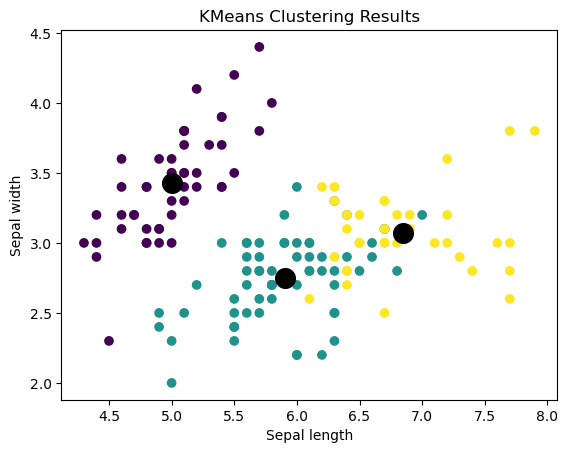

In [17]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# set the best parameters for KMeans
n_clusters = 3
init = 'k-means++'
max_iter = 100
tol = 1e-4

# create and fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, init=init, max_iter=max_iter, tol=tol)
kmeans.fit(X)

# plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='o', s=200, color='black')
plt.title('KMeans Clustering Results')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()


C:\Users\luckseegan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\luckseegan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


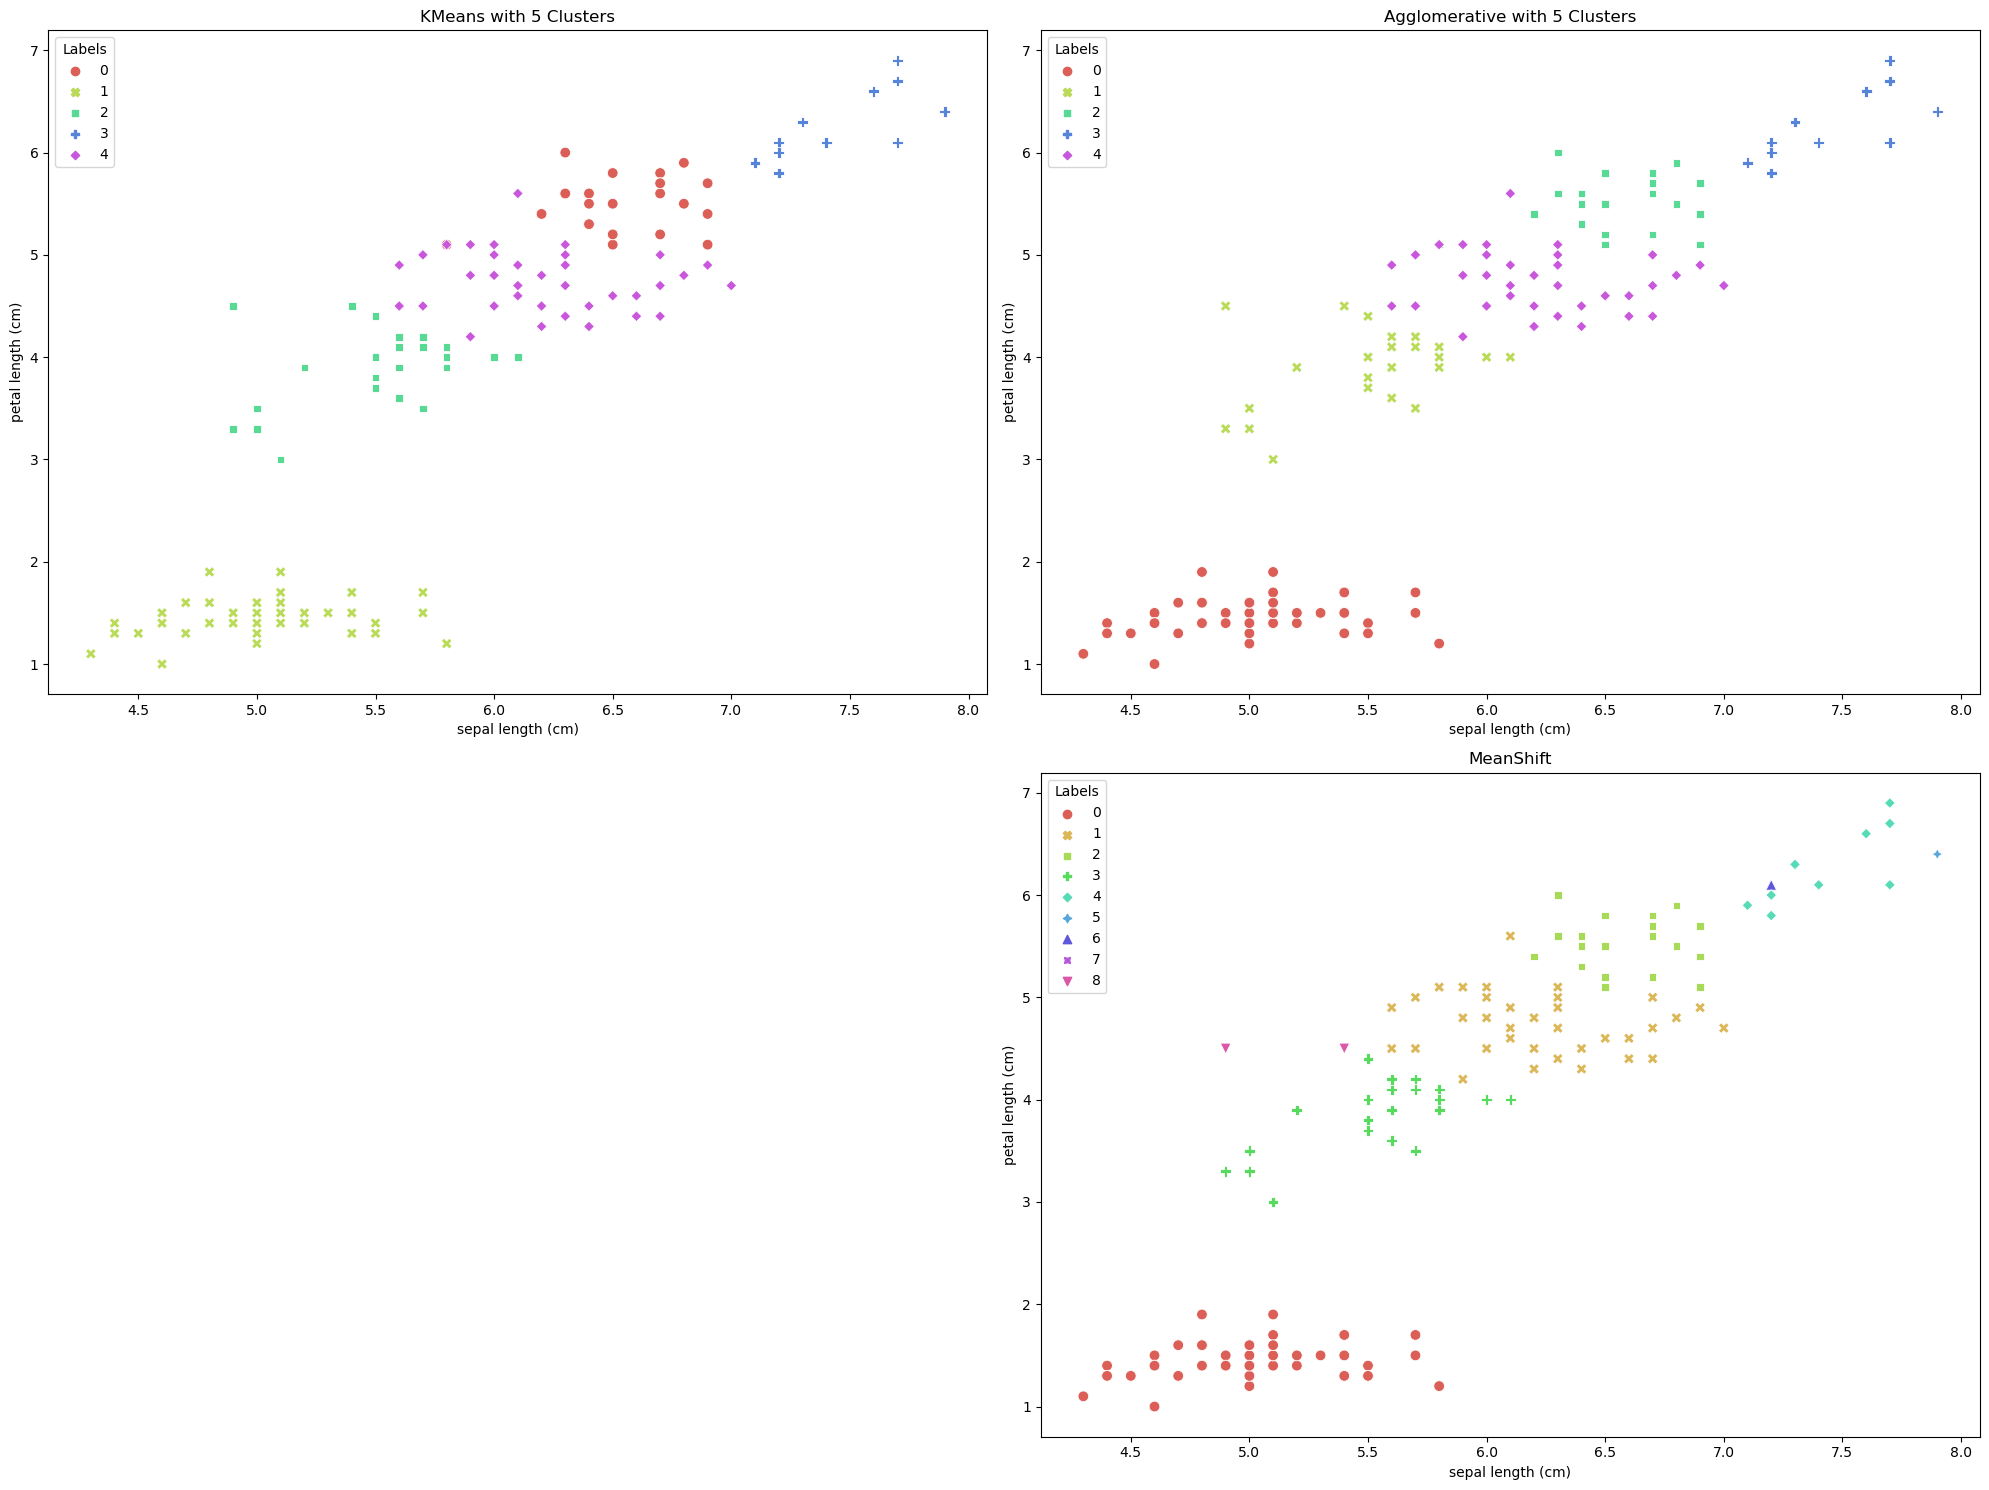

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift, estimate_bandwidth
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

# Visualize the clusters for KMeans, Agglomerative Clustering, and Mean Shift algorithms
fig = plt.figure(figsize=(20,15))

# KMeans
ax = fig.add_subplot(221)
km5 = KMeans(n_clusters=5).fit(X)
X['Labels'] = km5.labels_
sns.scatterplot(x=X['sepal length (cm)'], y=X['petal length (cm)'], hue=X['Labels'], style=X['Labels'],
                palette=sns.color_palette('hls', 5), s=60, ax=ax)
ax.set_title('KMeans with 5 Clusters')

# Agglomerative Clustering
ax = fig.add_subplot(222)
agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(X)
X['Labels'] = agglom.labels_
sns.scatterplot(x=X['sepal length (cm)'], y=X['petal length (cm)'], hue=X['Labels'], style=X['Labels'],
                palette=sns.color_palette('hls', 5), s=60, ax=ax)
ax.set_title('Agglomerative with 5 Clusters')

# Mean Shift
ax = fig.add_subplot(224)
bandwidth = estimate_bandwidth(X, quantile=0.1)
ms = MeanShift(bandwidth=bandwidth).fit(X)
X['Labels'] = ms.labels_
sns.scatterplot(x=X['sepal length (cm)'], y=X['petal length (cm)'], hue=X['Labels'], style=X['Labels'], s=60,
                palette=sns.color_palette('hls', np.unique(ms.labels_).shape[0]), ax=ax)
ax.set_title('MeanShift')

plt.tight_layout()
plt.show()


C:\Users\luckseegan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\luckseegan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



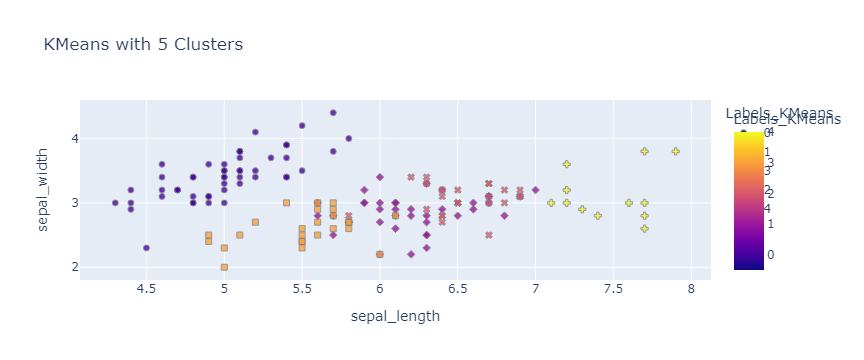

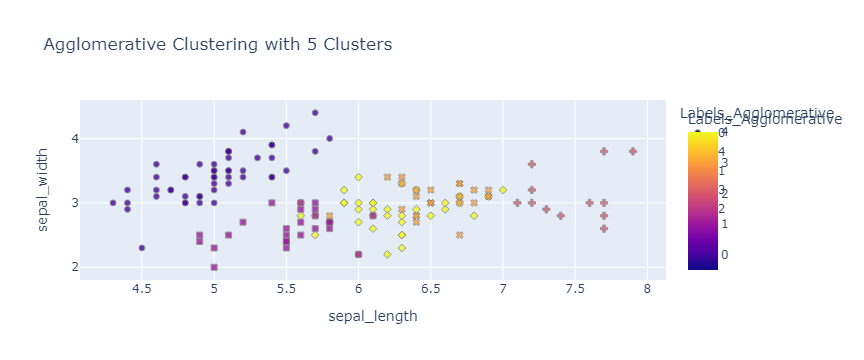

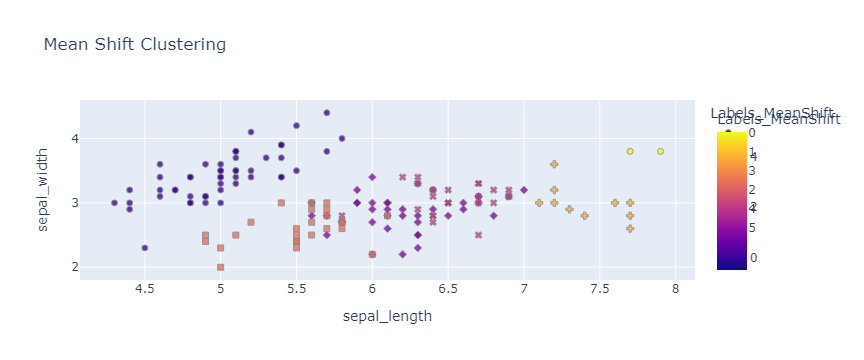

In [28]:
import plotly.express as px
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift, estimate_bandwidth
from sklearn.datasets import load_iris

iris = load_iris()
X = pd.DataFrame(iris['data'], columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

##### KMeans #####
km5 = KMeans(n_clusters=5).fit(X)
X['Labels_KMeans'] = km5.labels_

##### Agglomerative Clustering #####
agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(X)
X['Labels_Agglomerative'] = agglom.labels_

##### MEAN SHIFT #####
bandwidth = estimate_bandwidth(X, quantile=0.1)
ms = MeanShift(bandwidth=bandwidth).fit(X)
X['Labels_MeanShift'] = ms.labels_

fig = px.scatter(X, x='sepal_length', y='sepal_width', color='Labels_KMeans', 
                 symbol='Labels_KMeans', size_max=10, opacity=0.8,
                 title='KMeans with 5 Clusters')
fig.update_traces(marker=dict(line=dict(width=1, color='Gray')))
fig.show()

fig = px.scatter(X, x='sepal_length', y='sepal_width', color='Labels_Agglomerative', 
                 symbol='Labels_Agglomerative', size_max=10, opacity=0.8,
                 title='Agglomerative Clustering with 5 Clusters')
fig.update_traces(marker=dict(line=dict(width=1, color='Gray')))
fig.show()

fig = px.scatter(X, x='sepal_length', y='sepal_width', color='Labels_MeanShift', 
                 symbol='Labels_MeanShift', size_max=10, opacity=0.8,
                 title='Mean Shift Clustering')
fig.update_traces(marker=dict(line=dict(width=1, color='Gray')))
fig.show()


C:\Users\luckseegan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\luckseegan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\luckseegan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



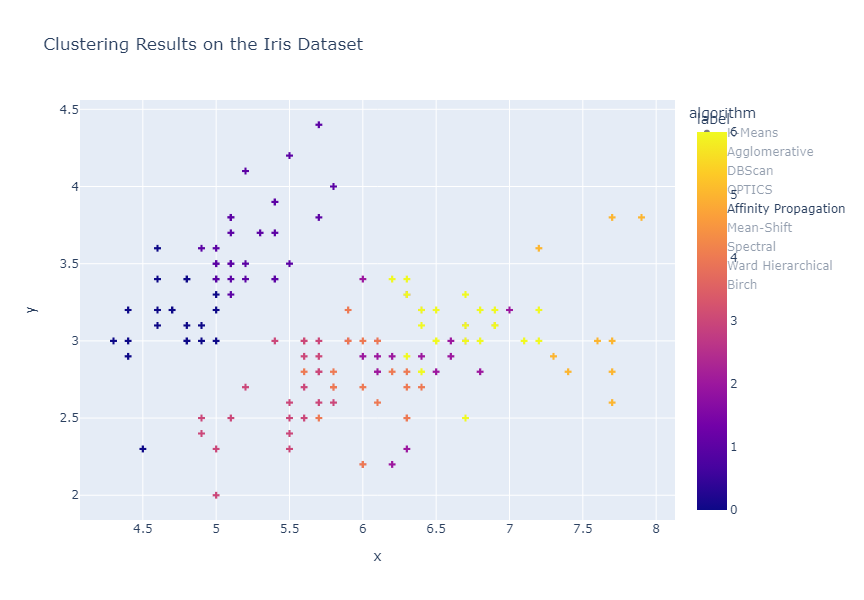

In [34]:
import plotly.express as px
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, OPTICS, AffinityPropagation, MeanShift, SpectralClustering, Birch
from sklearn.mixture import GaussianMixture

# Load the iris dataset
iris = load_iris()
X = iris.data

# Define the clustering algorithms
kmeans = KMeans(n_clusters=3, random_state=0)
agglo = AgglomerativeClustering(n_clusters=3)
dbscan = DBSCAN(eps=0.5, min_samples=5)
optics = OPTICS(min_samples=5)
gmm = GaussianMixture(n_components=3)
ap = AffinityPropagation()
ms = MeanShift()
sc = SpectralClustering(n_clusters=3)
ward = AgglomerativeClustering(n_clusters=3, linkage='ward')
birch = Birch(n_clusters=3)

algorithms = [kmeans, agglo, dbscan, optics, ap, ms, sc, ward, birch]
algorithm_names = ['K-Means', 'Agglomerative', 'DBScan', 'OPTICS', 'Affinity Propagation', 'Mean-Shift', 'Spectral', 'Ward Hierarchical', 'Birch']

# Fit the algorithms to the data and get the cluster labels
labels = []
for algorithm in algorithms:
    algorithm.fit(X)
    labels.append(algorithm.labels_)

# Create a DataFrame with the data and labels
df = pd.DataFrame({'x': X[:, 0], 'y': X[:, 1], 'label': labels[0], 'algorithm': algorithm_names[0]})
for i in range(1, len(algorithms)):
    df_temp = pd.DataFrame({'x': X[:, 0], 'y': X[:, 1], 'label': labels[i], 'algorithm': algorithm_names[i]})
    df = pd.concat([df, df_temp], axis=0)

# Plot the results using Plotly
fig = px.scatter(df, x='x', y='y', color='label', symbol='algorithm', title='Clustering Results on the Iris Dataset')
fig.update_layout(
    width=800,  # Set the width of the plot
    height=600  # Set the height of the plot
)

fig.show()


In [49]:
import plotly.express as px
import pandas as pd
import ast

def plot_clusters(df, row_nums):
    # Get the data for the best parameter combinations
    best_params = df.iloc[row_nums]
    algos = best_params['Algorithm'].unique()

    # Create a figure with subplots for each algorithm
    fig = px.subplots(
        nrows=len(algos), ncols=1, shared_xaxes=True, shared_yaxes=True,
        subplot_titles=[f"{a} with F1 Score={best_params[best_params['Algorithm']==a]['F1 Score'].iloc[0]:.2f}" for a in algos]
    )
    
    # Iterate over each algorithm and plot the clusters
    for i, algo in enumerate(algos):
        # Get the best parameter combination for the algorithm
        best_params_algo = best_params[best_params['Algorithm']==algo]
        params = ast.literal_eval(best_params_algo['Parameters'].iloc[0])

        # Create the clustering model with the best parameters
        if algo == 'KMeans':
            model = KMeans(n_clusters=params['n_clusters'], init=params['init'], max_iter=params['max_iter'], random_state=42)
        elif algo == 'Agglomerative':
            model = AgglomerativeClustering(n_clusters=params['n_clusters'], linkage=params['linkage'])
        elif algo == 'DBScan':
            model = DBSCAN(eps=params['eps'], min_samples=params['min_samples'])
        elif algo == 'Optics':
            model = OPTICS(min_samples=params['min_samples'], xi=params['xi'], min_cluster_size=params['min_cluster_size'])
        elif algo == 'GaussianMixture':
            model = GaussianMixture(n_components=params['n_components'], covariance_type=params['covariance_type'], random_state=42)
        elif algo == 'AffinityPropagation':
            model = AffinityPropagation(damping=params['damping'], preference=params['preference'])
        elif algo == 'MeanShift':
            model = MeanShift(bandwidth=params['bandwidth'])
        elif algo == 'Spectral':
            model = SpectralClustering(n_clusters=params['n_clusters'], affinity=params['affinity'], eigen_solver=params['eigen_solver'], assign_labels=params['assign_labels'])
        elif algo == 'Ward':
            model = AgglomerativeClustering(n_clusters=params['n_clusters'], linkage='ward', affinity=params['affinity'])
        elif algo == 'Birch':
            model = Birch(threshold=params['threshold'], branching_factor=params['branching_factor'], n_clusters=params['n_clusters'])

        # Fit the model and get the predicted labels
        X = df[df['Algorithm']==algo].drop(['Algorithm', 'Parameters', 'dataset'], axis=1)
        model.fit(X)
        labels = model.labels_

        # Add the predicted labels to the dataframe
        df.loc[df['Algorithm']==algo, 'Labels'] = labels

        # Plot the clusters using plotly
        fig.add_trace(
            px.scatter(df[df['Algorithm']==algo], x='Feature 1', y='Feature 2', color='Labels', title=algo).data[0],
            row=i+1, col=1
        )

    # Update the figure layout
    fig.update_layout(
        height=800, width=1000,
        showlegend=False,
        title='Clustering Results'
    )

    # Show the
    fig.show

C:\Users\luckseegan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\luckseegan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\luckseegan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



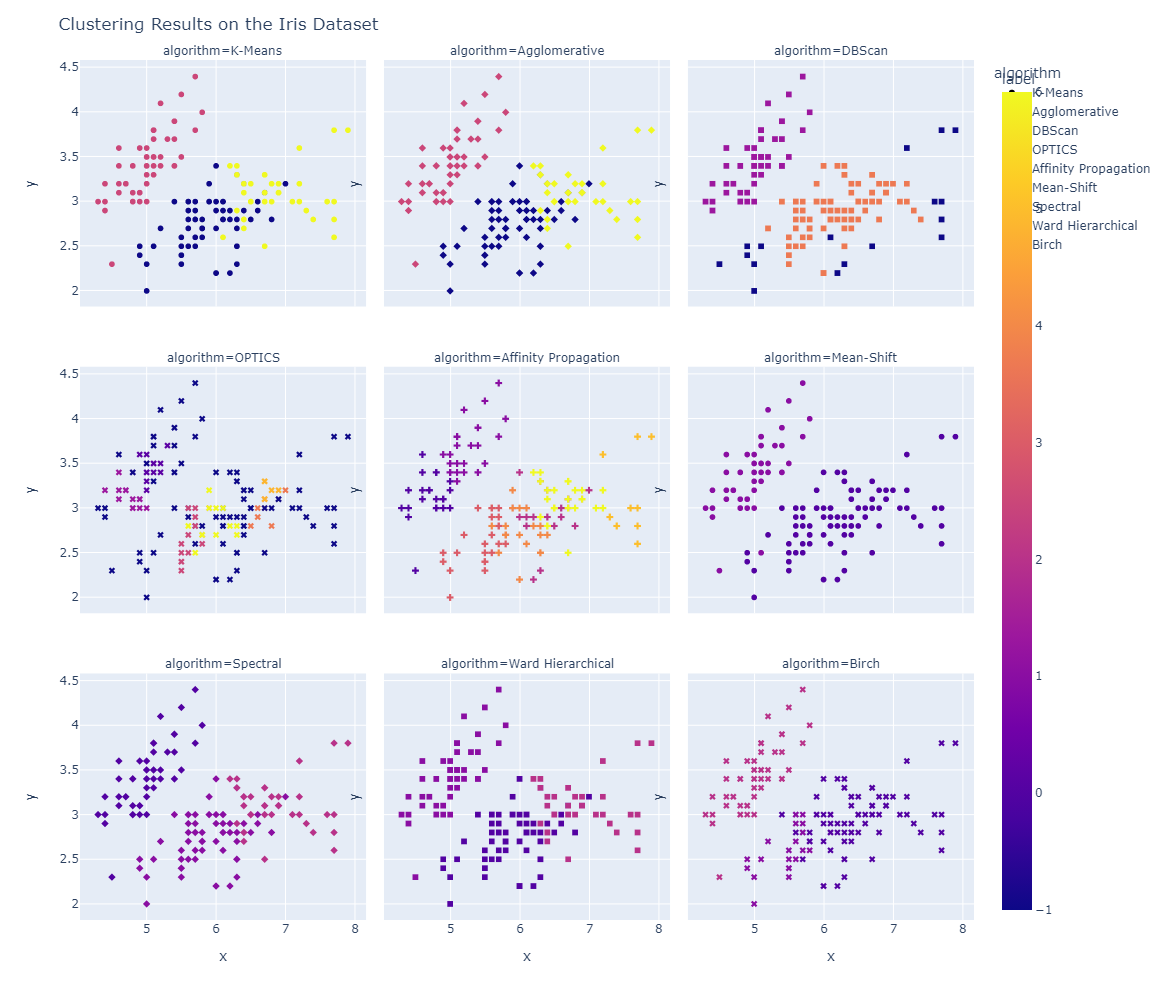

In [77]:
import plotly.express as px
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, OPTICS, AffinityPropagation, MeanShift, SpectralClustering, Birch
from sklearn.mixture import GaussianMixture

def plot_clusters_subplots(X, algorithms, algorithm_names):
    # Fit the algorithms to the data and get the cluster labels
    labels = []
    for algorithm in algorithms:
        algorithm.fit(X)
        labels.append(algorithm.labels_)

    # Create a DataFrame with the data and labels
    df = pd.DataFrame({'x': X[:, 0], 'y': X[:, 1], 'label': labels[0], 'algorithm': algorithm_names[0]})
    for i in range(1, len(algorithms)):
        df_temp = pd.DataFrame({'x': X[:, 0], 'y': X[:, 1], 'label': labels[i], 'algorithm': algorithm_names[i]})
        df = pd.concat([df, df_temp], axis=0)

    # Create subplots for each algorithm
    fig = px.scatter(df, x='x', y='y', color='label', symbol='algorithm',
                     facet_col='algorithm', facet_col_wrap=3)

    # Update layout of each subplot
    for i in range(len(algorithm_names)):
        fig.update_xaxes(row=i//3+1, col=i%3+1)
        fig.update_yaxes(title_text='y', row=i//3+1, col=i%3+1)
    
    fig.update_layout(title='Clustering Results on the Iris Dataset', height=1000, width=1000)
    fig.show()

# Load the iris dataset
iris = load_iris()
X = iris.data

# Define the clustering algorithms
kmeans = KMeans(n_clusters=3, random_state=0)
agglo = AgglomerativeClustering(n_clusters=3)
dbscan = DBSCAN(eps=0.5, min_samples=5)
optics = OPTICS(min_samples=5)
gmm = GaussianMixture(n_components=3)
ap = AffinityPropagation()
ms = MeanShift()
sc = SpectralClustering(n_clusters=3)
ward = AgglomerativeClustering(n_clusters=3, linkage='ward')
birch = Birch(n_clusters=3)

algorithms = [kmeans, agglo, dbscan, optics, ap, ms, sc, ward, birch]
algorithm_names = ['K-Means', 'Agglomerative', 'DBScan', 'OPTICS', 'Affinity Propagation', 'Mean-Shift', 'Spectral', 'Ward Hierarchical', 'Birch']

# Plot the results using Plotly
plot_clusters_subplots(X, algorithms, algorithm_names)


In [158]:
import ast

# assuming your dataframe is named df
params_dict = ast.literal_eval(df.iloc[0,1])
params_dict

{'init': 'random', 'max_iter': 300, 'n_clusters': 3}

In [164]:
import ast

# assuming your dataframe is named df
algo = (df.iloc[1,0])
algo

'AgglomerativeClustering'

In [119]:
agglo = AgglomerativeClustering(**eval(df['Parameters'].iloc[1]))
agglo

AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=3)

In [ ]:
    # Define the clustering algorithms
for i in len(df):
    kmeans = KMeans(n_clusters=3, random_state=0)
    agglo = AgglomerativeClustering(n_clusters=3)
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    optics = OPTICS(min_samples=5)
    gmm = GaussianMixture(n_components=3)
    ap = AffinityPropagation()
    ms = MeanShift()
    sc = SpectralClustering(n_clusters=3)
    ward = AgglomerativeClustering(n_clusters=3, linkage='ward')
    birch = Birch(n_clusters=3)

In [111]:
k=KMeans(**eval(df['Parameters'].iloc[0]))
k

KMeans(init='random', n_clusters=3)

In [ ]:
def run_algorithm(params):
    algorithm_name = params['name']
    algorithm_class = params['class']
    param_grid = params['param_grid']
    results = []
    for param_comb in ParameterGrid(param_grid):
        algorithm = algorithm_class(**param_comb)
        start_time = time()
        algorithm.fit(X)
        exec_time = time() - start_time
        if algorithm_name == 'GaussianMixture':
            labels = algorithm.predict(X)
        else:
            labels = algorithm.labels_

In [ ]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from sklearn.datasets import load_iris
#from sklearn.cluster import KMeans, AgglomerativeClustering, OPTICS, GaussianMixture, AffinityPropagation, MeanShift, SpectralClustering, Birch, Ward

# Load the iris dataset
iris = load_iris()

# Define the clustering algorithms
algorithms = [
    KMeans(**eval(df['Parameters'].iloc[i])),
    AgglomerativeClustering(**eval(df['Parameters'].iloc[i])),
    OPTICS(**eval(df['Parameters'].iloc[i])),
    GaussianMixture(**eval(df['Parameters'].iloc[i])),
    AffinityPropagation(**eval(df['Parameters'].iloc[i])),
    MeanShift(**eval(df['Parameters'].iloc[i])),
    SpectralClustering(**eval(df['Parameters'].iloc[i])),
    Birch(**eval(df['Parameters'].iloc[i])),
    Ward(**eval(df['Parameters'].iloc[i]))
]

# Define the colors for each cluster
colors = {
    0: 'rgb(31, 119, 180)',
    1: 'rgb(255, 127, 14)',
    2: 'rgb(44, 160, 44)',
    3: 'rgb(214, 39, 40)',
    4: 'rgb(148, 103, 189)',
    5: 'rgb(140, 86, 75)',
    6: 'rgb(227, 119, 194)',
    7: 'rgb(127, 127, 127)',
    8: 'rgb(188, 189, 34)',
    9: 'rgb(23, 190, 207)'
}

# Create the subplots
fig = make_subplots(rows=3, cols=3, subplot_titles=df.index)

# Loop over the algorithms and add the clusters to the subplots
for i, algorithm in enumerate(algorithms):
    # Fit the algorithm to the iris dataset
    algorithm.fit(iris.data)
    
    # Get the predicted clusters and add them to the subplots
    clusters = algorithm.labels_
    fig.add_trace(go.Scatter(x=iris.data[:, 0], y=iris.data[:, 1], mode='markers', 
                             marker=dict(color=[colors[c] for c in clusters]), showlegend=False),
                  row=(i // 3) + 1, col=(i % 3) + 1)

# Set the layout of the subplots
fig.update_layout(title='Clustering Results for Iris Dataset',
                  height=800, width=800, hovermode='closest')

# Show the plot
fig.show()


In [138]:
import plotly.express as px
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, OPTICS, AffinityPropagation, MeanShift, SpectralClustering, Birch
from sklearn.mixture import GaussianMixture
def create_cluster(algorithm, params):
    """
    Create a clustering object with the specified parameters.
    
    Parameters:
        algorithm (str): The name of the clustering algorithm to use.
        params (dict): The parameters for the clustering algorithm.
        
    Returns:
        A clustering object with the specified parameters.
    """
    
    # Get the class object for the specified algorithm
    clustering_class = getattr(cluster, algorithm)
    
    # Create the clustering object with the specified parameters
    clustering = clustering_class(**params)
    
    return clustering


In [165]:
import sklearn.cluster as cluster
import sklearn.mixture as mixture
for index, row in df.iterrows():
    
    #algorithm=row['Algorithm']
    #params=eval(row['Parameters'])
    algorithm = (df.iloc[1,0])
    params=ast.literal_eval(df.iloc[0,1])
    # Get the class object for the specified algorithm
    try:
        # Try to get the class object from the cluster module
        if algorithm=='Ward':
            clustering_class =getattr(cluster, 'AgglomerativeClustering')
        else:
            clustering_class = getattr(cluster, algorithm)
    except AttributeError:
        # If it's not in the cluster module, try to get it from the mixture module
        clustering_class = getattr(mixture, algorithm)
     # Create the clustering object with the specified parameters
    clustering = clustering_class(**params)
    print(clustering)

TypeError: AgglomerativeClustering.__init__() got an unexpected keyword argument 'init'

In [156]:
df

Algorithm  \
13                    KMeans   
23   AgglomerativeClustering   
50                    OPTICS   
61           GaussianMixture   
128      AffinityPropagation   
87                 MeanShift   
92        SpectralClustering   
133                     Ward   
111                    Birch   

                                            Parameters  
13   {'init': 'random', 'max_iter': 300, 'n_cluster...  
23   {'affinity': 'euclidean', 'linkage': 'average'...  
50                       {'min_samples': 7, 'xi': 0.1}  
61   {'covariance_type': 'tied', 'max_iter': 100, '...  
128                 {'damping': 0.7, 'preference': -1}  
87             {'bandwidth': 0.5, 'cluster_all': True}  
92   {'affinity': 'nearest_neighbors', 'n_clusters'...  
133  {'affinity': 'euclidean', 'linkage': 'ward', '...  
111  {'branching_factor': 20, 'n_clusters': 4, 'thr...

In [172]:
import sklearn.cluster as cluster
import sklearn.mixture as mixture
for i in range (len(df)):
    
    #algorithm=row['Algorithm']
    #params=eval(row['Parameters'])
    algorithm = (df.iloc[i,0])
    params=ast.literal_eval(df.iloc[i,1])
    # Get the class object for the specified algorithm
    try:
        # Try to get the class object from the cluster module
        if algorithm=='Ward':
            clustering_class =getattr(cluster, 'AgglomerativeClustering')
        else:
            clustering_class = getattr(cluster, algorithm)
    except AttributeError:
        # If it's not in the cluster module, try to get it from the mixture module
        clustering_class = getattr(mixture, algorithm)
     # Create the clustering object with the specified parameters
    clustering = clustering_class(**params)
    print(params)

{'init': 'random', 'max_iter': 300, 'n_clusters': 3}
{'affinity': 'euclidean', 'linkage': 'average', 'n_clusters': 3}
{'min_samples': 7, 'xi': 0.1}
{'covariance_type': 'tied', 'max_iter': 100, 'n_components': 3}
{'damping': 0.7, 'preference': -1}
{'bandwidth': 0.5, 'cluster_all': True}
{'affinity': 'nearest_neighbors', 'n_clusters': 3, 'n_neighbors': 5}
{'affinity': 'euclidean', 'linkage': 'ward', 'n_clusters': 4}
{'branching_factor': 20, 'n_clusters': 4, 'threshold': 0.1}


In [173]:
import sklearn.cluster as cluster
import sklearn.mixture as mixture
for i in range (len(df)):
        #algorithm=row['Algorithm']
    #params=eval(row['Parameters'])
    algorithm = (df.iloc[i,0])
    params=ast.literal_eval(df.iloc[i,1])
    # Get the class object for the specified algorithm
    try:
        # Try to get the class object from the cluster module
        if algorithm=='Ward':
            clustering_class =getattr(cluster, 'AgglomerativeClustering')
        else:
            clustering_class = getattr(cluster, algorithm)
    except AttributeError:
        # If it's not in the cluster module, try to get it from the mixture module
        clustering_class = getattr(mixture, algorithm)
     # Create the clustering object with the specified parameters
    clustering = clustering_class(**params)
    print(clustering)

KMeans(init='random', n_clusters=3)
AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=3)
OPTICS(min_samples=7, xi=0.1)
GaussianMixture(covariance_type='tied', n_components=3)
AffinityPropagation(damping=0.7, preference=-1)
MeanShift(bandwidth=0.5)
SpectralClustering(affinity='nearest_neighbors', n_clusters=3, n_neighbors=5)
AgglomerativeClustering(affinity='euclidean', n_clusters=4)
Birch(branching_factor=20, n_clusters=4, threshold=0.1)


In [182]:
import plotly.express as px
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, OPTICS, AffinityPropagation, MeanShift, SpectralClustering, Birch
from sklearn.mixture import GaussianMixture

def plot_clusters_subplots(X, df):
    # Fit the algorithms to the data and get the cluster labels
    labels = []
    for i in range (len(df)):
        #algorithm=row['Algorithm']
        #params=eval(row['Parameters'])
        algorithm = (df.iloc[i,0])
        params=ast.literal_eval(df.iloc[i,1])
        # Get the class object for the specified algorithm
        try:
            # Try to get the class object from the cluster module
            if algorithm=='Ward':
                clustering_class =getattr(cluster, 'AgglomerativeClustering')
            else:
                clustering_class = getattr(cluster, algorithm)
        except AttributeError:
            # If it's not in the cluster module, try to get it from the mixture module
            clustering_class = getattr(mixture, algorithm)
         # Create the clustering object with the specified parameters
        clustering = clustering_class(**params)
        #print(clustering)
        clustering.fit(X)
        if algorithm == 'GaussianMixture':
            labels.append(clustering.predict(X))
        else:
            labels.append(clustering.labels_)

    # Create a DataFrame with the data and labels
    df = pd.DataFrame({'x': X[:, 0], 'y': X[:, 1], 'label': labels[0], 'algorithm': algorithm_names[0]})
    for i in range(1, len(algorithms)):
        df_temp = pd.DataFrame({'x': X[:, 0], 'y': X[:, 1], 'label': labels[i], 'algorithm': algorithm_names[i]})
        df = pd.concat([df, df_temp], axis=0)

    # Create subplots for each algorithm
    fig = px.scatter(df, x='x', y='y', color='label', symbol='algorithm',
                     facet_col='algorithm', facet_col_wrap=3)

    # Update layout of each subplot
    for i in range(len(algorithm_names)):
        fig.update_xaxes(row=i//3+1, col=i%3+1)
        fig.update_yaxes(title_text='y', row=i//3+1, col=i%3+1)
    
    fig.update_layout(title='Clustering Results on the Iris Dataset', height=1000, width=1000)
    fig.show()



Iris

C:\Users\luckseegan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\luckseegan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\luckseegan\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead

C:\Users\luckseegan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\lucks

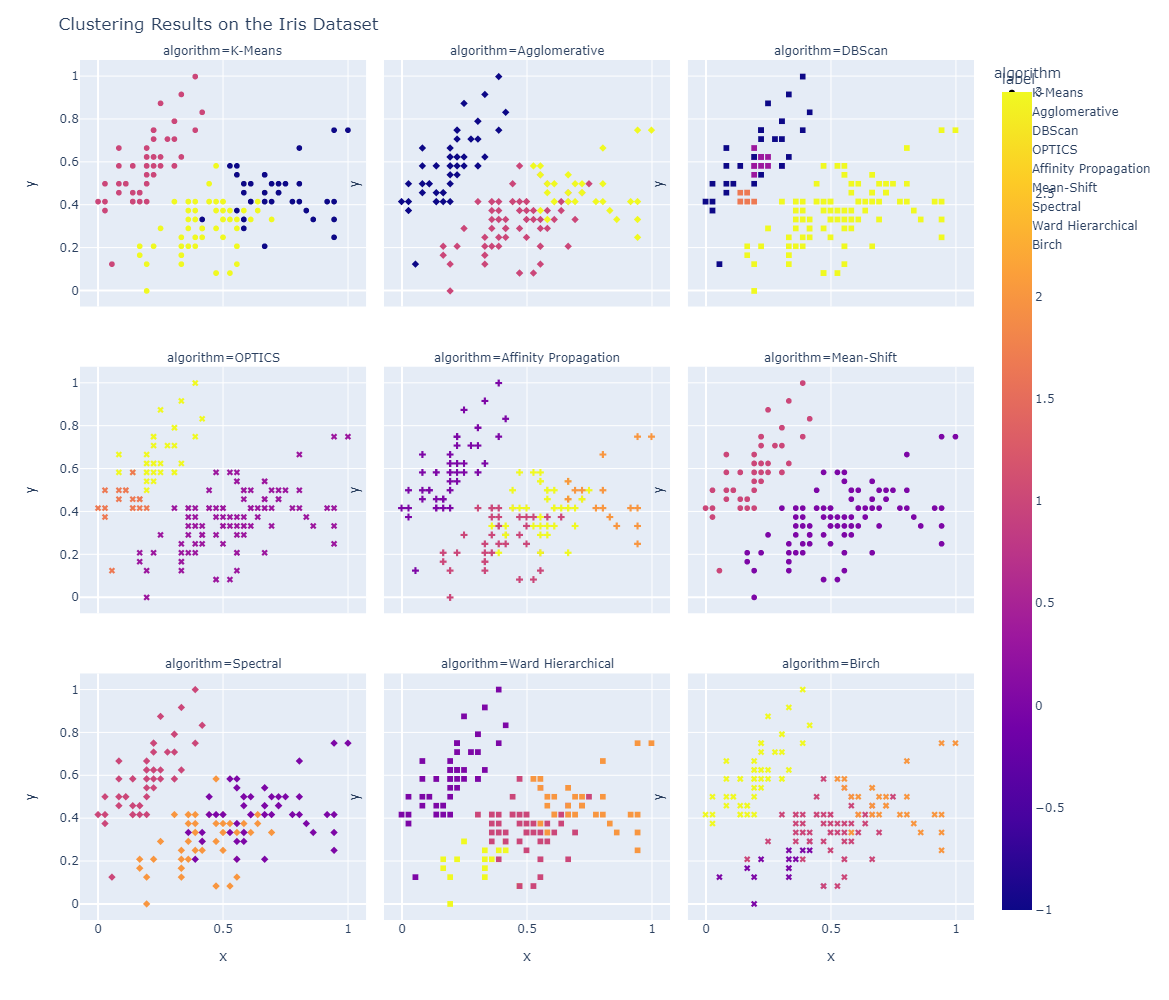

In [188]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import openml


le = LabelEncoder()
scaler = MinMaxScaler()
# Load the iris dataset
iris = openml.datasets.get_dataset(61)
X, y, categorical_indicator, attribute_names = iris.get_data(target=iris.default_target_attribute)
# Convert the categorical target variable to numerical using LabelEncoder and MinMax scaling
X = scaler.fit_transform(X)
y = le.fit_transform(y)

# Plot the results using Plotly
plot_clusters_subplots(X, df)


Wine

In [233]:
df

Algorithm  \
8                     KMeans   
20   AgglomerativeClustering   
51                    OPTICS   
42                    DBSCAN   
72           GaussianMixture   
129      AffinityPropagation   
89                 MeanShift   
105       SpectralClustering   
137                     Ward   
30   AgglomerativeClustering   

                                            Parameters  
8    {'init': 'k-means++', 'max_iter': 500, 'n_clus...  
20   {'affinity': 'euclidean', 'linkage': 'complete...  
51                      {'min_samples': 7, 'xi': 0.01}  
42                      {'eps': 0.5, 'min_samples': 3}  
72   {'covariance_type': 'diag', 'max_iter': 100, '...  
129                {'damping': 0.5, 'preference': -10}  
89             {'bandwidth': 0.5, 'cluster_all': True}  
105  {'affinity': 'rbf', 'n_clusters': 3, 'n_neighb...  
137  {'affinity': 'euclidean', 'linkage': 'ward', '...  
30   {'affinity': 'manhattan', 'linkage': 'average'...

In [234]:
wine = openml.datasets.get_dataset(187)
X, y, categorical_indicator, attribute_names = wine.get_data(target=wine.default_target_attribute)

In [235]:
# Convert the categorical target variable to numerical using LabelEncoder and MinMax scaling
X = scaler.fit_transform(X)
y = le.fit_transform(y)

C:\Users\luckseegan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\luckseegan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\luckseegan\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead

C:\Users\luckseegan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\lucks

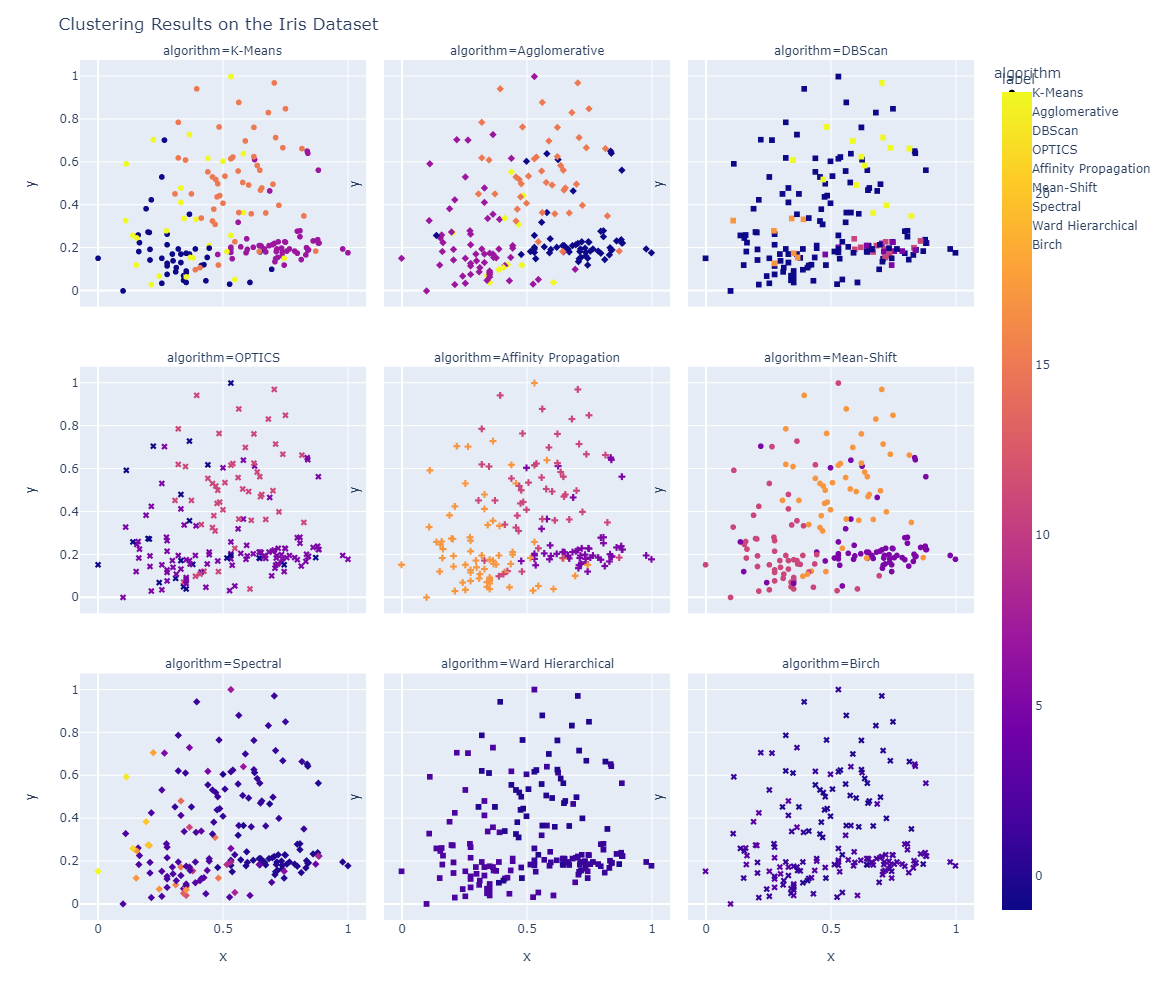

In [236]:
plot_clusters_subplots(X, df)

Glass

In [213]:
df

Algorithm  \
4                     KMeans   
36   AgglomerativeClustering   
47                    DBSCAN   
51                    OPTICS   
66           GaussianMixture   
93                 MeanShift   
134      AffinityPropagation   
110       SpectralClustering   
141                     Ward   
132                    Birch   

                                            Parameters  
4    {'init': 'k-means++', 'max_iter': 300, 'n_clus...  
36   {'affinity': 'cosine', 'linkage': 'complete', ...  
47                      {'eps': 1.0, 'min_samples': 7}  
51                      {'min_samples': 5, 'xi': 0.01}  
66   {'covariance_type': 'tied', 'max_iter': 100, '...  
93             {'bandwidth': 0.5, 'cluster_all': True}  
134                {'damping': 0.5, 'preference': -10}  
110  {'affinity': 'rbf', 'n_clusters': 3, 'n_neighb...  
141  {'affinity': 'euclidean', 'linkage': 'ward', '...  
132  {'branching_factor': 100, 'n_clusters': 4, 'th...

In [214]:
glass = openml.datasets.get_dataset(41)
X, y, categorical_indicator, attribute_names = glass.get_data(target=glass.default_target_attribute)

In [215]:
# Convert the categorical target variable to numerical using LabelEncoder and MinMax scaling
X = scaler.fit_transform(X)
y = le.fit_transform(y)

C:\Users\luckseegan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\luckseegan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\luckseegan\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead

C:\Users\luckseegan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\lucks

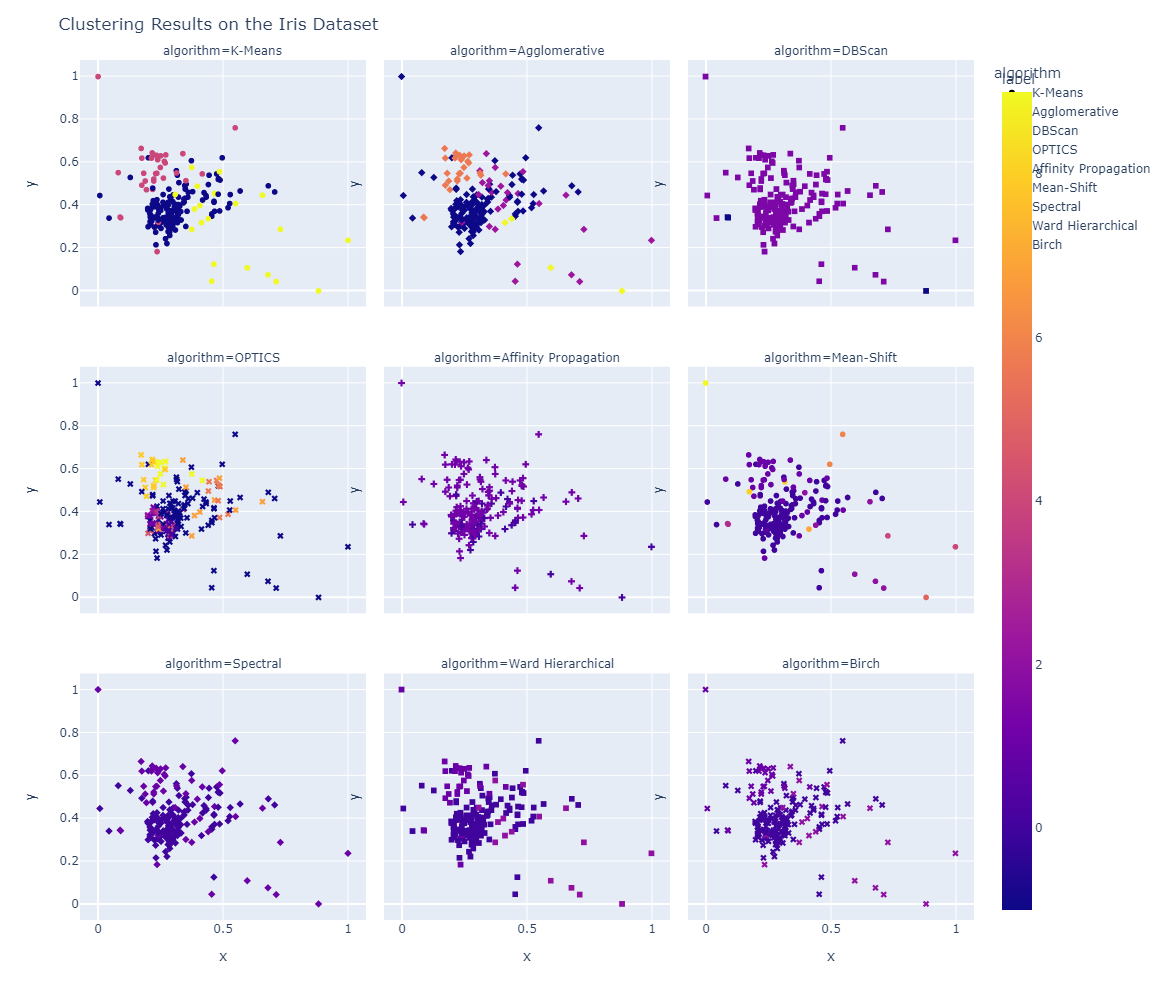

In [216]:
# Plot the results using Plotly
plot_clusters_subplots(X, df)

haberman

In [252]:
df

Algorithm  \
0                     KMeans   
23   AgglomerativeClustering   
42                    OPTICS   
81           GaussianMixture   
122      AffinityPropagation   
88                 MeanShift   
105       SpectralClustering   
125                     Ward   
108                    Birch   

                                            Parameters  
0    {'init': 'k-means++', 'max_iter': 100, 'n_clus...  
23   {'affinity': 'euclidean', 'linkage': 'average'...  
42                      {'min_samples': 3, 'xi': 0.01}  
81   {'covariance_type': 'spherical', 'max_iter': 3...  
122                  {'damping': 0.9, 'max_iter': 100}  
88            {'bandwidth': 1.0, 'cluster_all': False}  
105  {'affinity': 'rbf', 'n_clusters': 4, 'n_neighb...  
125  {'affinity': 'euclidean', 'linkage': 'ward', '...  
108  {'branching_factor': 20, 'n_clusters': 3, 'thr...

In [254]:
haberman = openml.datasets.get_dataset(43)
X, y, categorical_indicator, attribute_names = haberman.get_data(target=haberman.default_target_attribute)
X = scaler.fit_transform(X)
y = le.fit_transform(y)

C:\Users\luckseegan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\luckseegan\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead

C:\Users\luckseegan\anaconda3\lib\site-packages\sklearn\cluster\_optics.py:932: RuntimeWarning:

divide by zero encountered in divide

C:\Users\luckseegan\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



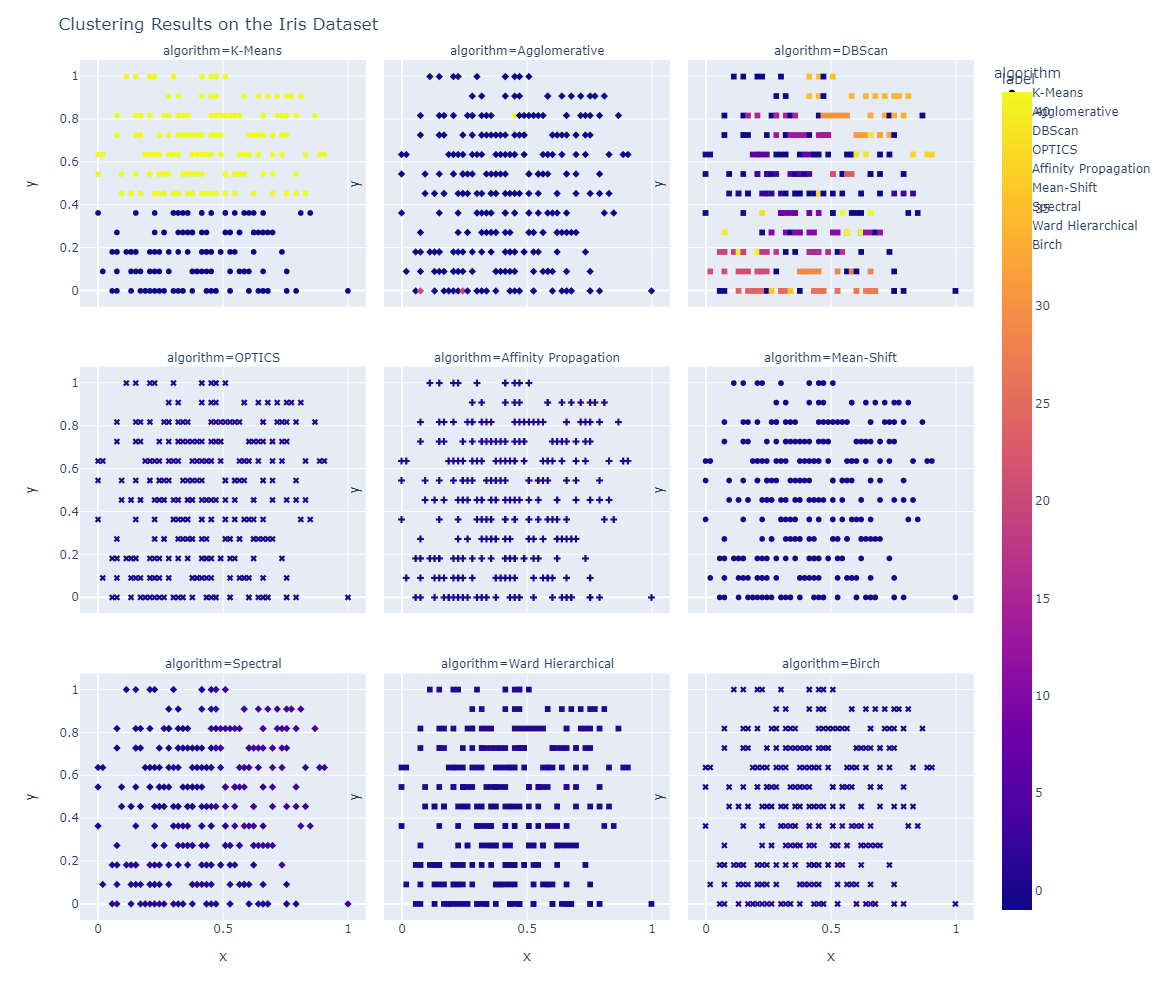

In [255]:
plot_clusters_subplots(X, df)

libras

In [281]:
df

Algorithm  \
17                    KMeans   
23   AgglomerativeClustering   
51                    OPTICS   
48                    DBSCAN   
86           GaussianMixture   
158      AffinityPropagation   
98                 MeanShift   
109       SpectralClustering   
150                     Ward   
145                    Birch   

                                            Parameters  
17   {'init': 'random', 'max_iter': 500, 'n_cluster...  
23   {'affinity': 'euclidean', 'linkage': 'average'...  
51                      {'min_samples': 3, 'xi': 0.01}  
48                      {'eps': 1.5, 'min_samples': 3}  
86   {'covariance_type': 'diag', 'max_iter': 500, '...  
158                  {'damping': 0.9, 'max_iter': 200}  
98             {'bandwidth': 1.0, 'cluster_all': True}  
109  {'affinity': 'nearest_neighbors', 'n_clusters'...  
150  {'affinity': 'euclidean', 'linkage': 'ward', '...  
145  {'branching_factor': 100, 'n_clusters': 4, 'th...

In [282]:
libras = openml.datasets.get_dataset(299)
X, y, categorical_indicator, attribute_names = libras.get_data(target=libras.default_target_attribute)
X = scaler.fit_transform(X)
y = le.fit_transform(y)

C:\Users\luckseegan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\luckseegan\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead

C:\Users\luckseegan\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



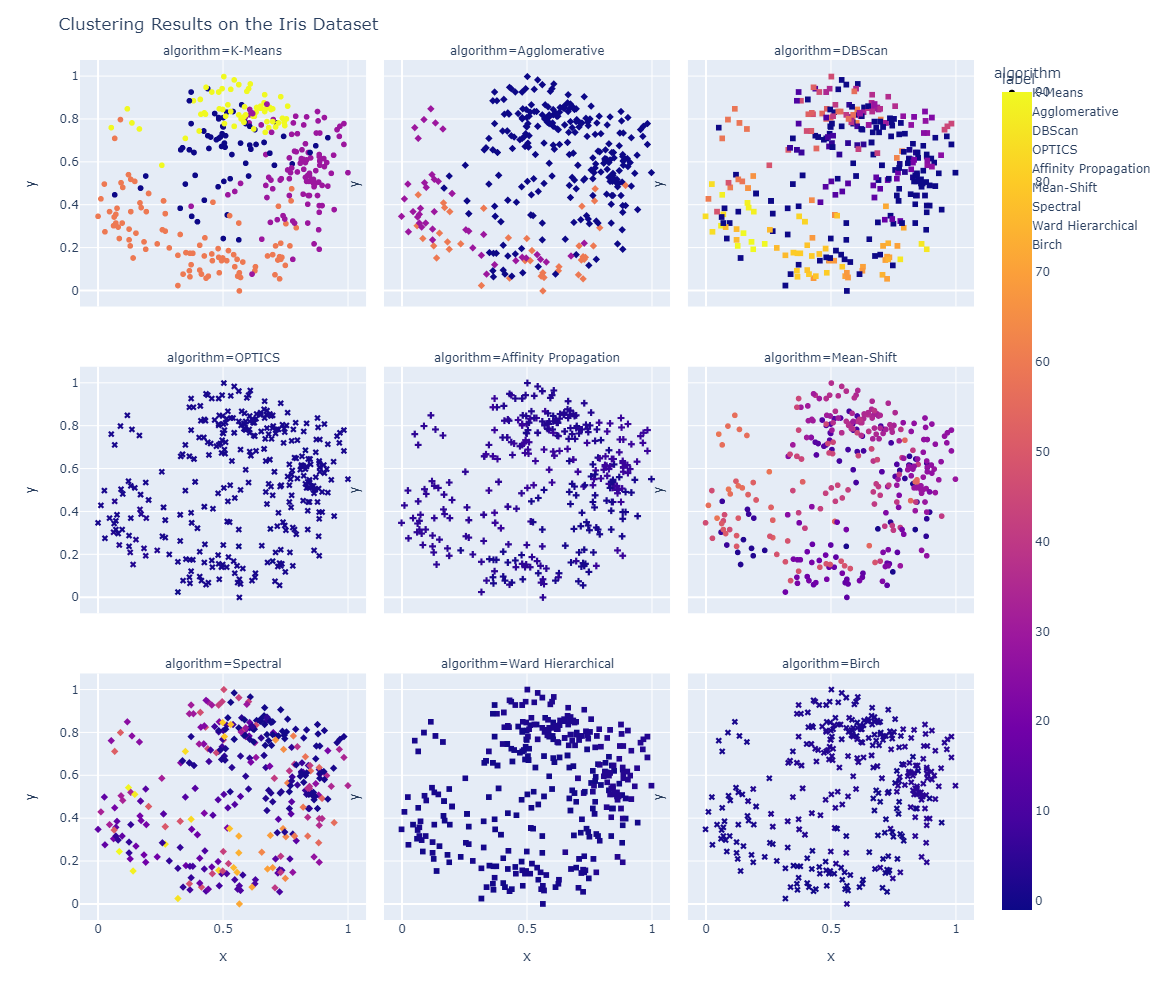

In [283]:
plot_clusters_subplots(X, df)

Satelite Image

In [ ]:
satelite = openml.datasets.get_dataset(294)
X, y, categorical_indicator, attribute_names = satelite.get_data(target=satelite.default_target_attribute)
X = scaler.fit_transform(X)
y = le.fit_transform(y)

In [9]:
!pip install powerbiclient
from powerbiclient import Report, models


     ------------------------------------ 787.5/787.5 kB 957.2 kB/s eta 0:00:00
     ---------------------------------------- 89.9/89.9 kB 2.5 MB/s eta 0:00:00


In [10]:
from IPython.display import IFrame

In [11]:
IFrame(src='https://app.powerbi.com/view?r=eyJrIjoiN2E5NDEzZTEtY2VmYi00M2NlLTkyNTItODU3NmNiNDUzNDFjIiwidCI6ImFhYzBjNTY0LTZjNWUtNGIwNS04ZGMzLTQwODA4N2Y3N2Y3NiIsImMiOjEwfQ%3D%3D', height = 636 , width = 800)